In [0]:
!pip install -U -q PyDrive

    100% |████████████████████████████████| 993kB 1.7MB/s 


In [0]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


%matplotlib inline

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

In [0]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp = pd.read_html(sp_url, header=0)[0] # returns a list for each table
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
Security                 505 non-null object
Symbol                   505 non-null object
SEC filings              505 non-null object
GICS Sector              505 non-null object
GICS Sub Industry        505 non-null object
Headquarters Location    505 non-null object
Date first added         402 non-null object
CIK                      505 non-null int64
Founded                  172 non-null object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB


In [0]:
symbols = [x for x in sp.Symbol if x.find(".")==-1]

In [0]:
start = datetime(2014, 1, 1)
end = datetime(2019, 4, 20)
stock_data = pdr.data.DataReader(symbols, 'yahoo', start=start, end=end)

In [0]:
stock_data['Date'] = stock_data.index
sd_melt = stock_data.melt(id_vars=["Date"])
sd_data = pd.pivot_table(sd_melt, index=["Date", "Symbols"], columns="Attributes", values="value")

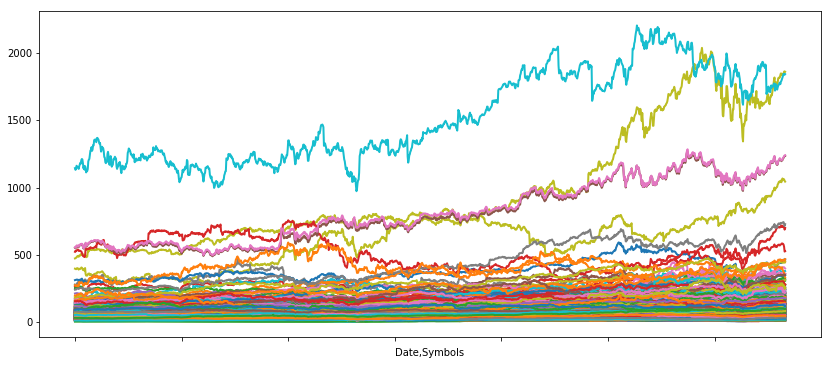

In [0]:
sd_data.groupby(level=['Symbols']).Close.plot(lw=2, legend=False, figsize=(14, 6));

In [0]:
sd_data.to_pickle("source_stock_data.pkl")

In [0]:
file = drive.CreateFile()
file.SetContentFile("source_stock_data.pkl")
file.Upload() 